## Instructions
-----
This file contains code that helps you get started on the linear exercise. You will need to complete the following functions in this exerices:

* warmUpExercise.py
* plotData.py
* gradientDescent.py
* computeCost.py
* gradientDescentMulti.py
* computeCostMulti.py
* featureNormalize.py
* normalEqn.py

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

_x_ refers to the population size in 10,000s  
_y_ refers to the profit in $10,000s
<hr>

## Part 1: Basic Function
---

Complete `warmUpExercise.py`

In [1]:
import numpy as np

def warmUpExercise():
    """
    WARMUPEXERCISE Example function
    A = WARMUPEXERCISE() is an example function that returns the 5x5 identity matrix
    """
    A = []              

    A = np.eye(5)
    return A

In [2]:
print('Running warmUpExercise ...')
print('5x5 Identity Matrix: ')
warmUpExercise()

Running warmUpExercise ...
5x5 Identity Matrix: 


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

<hr>

## Part 2: Plotting
---

Plotting Data ...
Number of Training Examples:  97


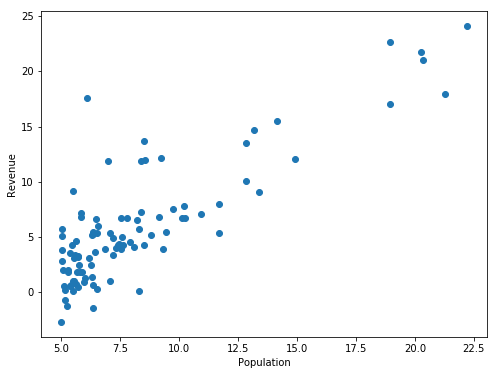

In [193]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print('Plotting Data ...')

data = pd.read_csv('ex1data1.txt', sep=",", header=None)

X = data.iloc[:, 0]
y = data.iloc[:, 1]
m = len(y) # number of training examples

print('Number of Training Examples: ', m)

#Plot Data
fig = plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('Population')
plt.ylabel('Revenue')
plt.show()

<hr>

## Part 3: Cost and Gradient descent
---

In [194]:
# Calculate Cost
def computeCost(X, y, theta):
    """
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    
    # Initialize some useful values
    m = len(y) # number of training examples

    # You need to return the following variables correctly 
    J = 0

    h = X @ theta
    h = np.ravel(h)
    err = h - y
    sqrErrors = np.square(err)
    J = 1 / (2 * m) * sum(sqrErrors)
    
    return J

In [195]:
ones = np.ones((m, 1))
X_arr = X.reshape((m, 1))

X = np.hstack( ((ones), (X_arr)) ) # Add a column of ones to X
theta = np.zeros((2, 1)) # initialize fitting parameters
print(X.shape)

#Some gradient descent settings
iterations = 1500
alpha = 0.01

print('Testing the cost function ...')

# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [[0][0]]\nCost computed = %f' % J)
print('Expected cost value (approx) 32.07')

# further testing of the cost function
J = computeCost(X, y, np.matrix('-1; 2'))
print('With theta = [-1 ; 2]\nCost computed = %f' % J)
print('Expected cost value (approx) 54.24')

(97, 2)
Testing the cost function ...
With theta = [[0][0]]
Cost computed = 32.072734
Expected cost value (approx) 32.07
With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24


/Users/Heba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [196]:
# Calculate Gradient Descent
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros([num_iters, 1])
    
    for iter in range(1, num_iters):
        h = X @ theta
        h = np.ravel(h)
        err = h - y
        theta = theta - (alpha * (1 / m) * (X.T @ err.reshape((97,1))))
                                    
        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, np.asmatrix(theta))

    return theta, J_history

Running Gradient Descent ...
[[-3.89578088]
 [ 1.19303364]]
Theta found by gradient descent:
[[-3.89578088]
 [ 1.19303364]]
Expected theta values (approx)
 -3.6303
  1.1664




/Users/Heba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


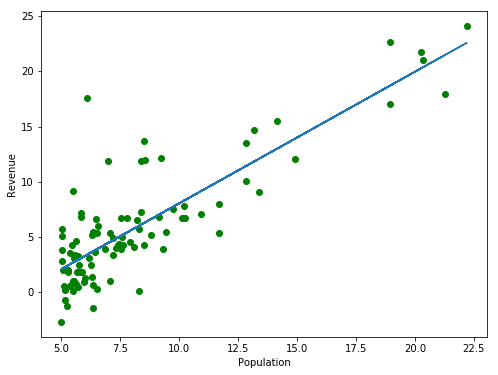

For population = 35,000, we predict a profit of 2798.368764
For population = 70,000, we predict a profit of 44554.546310


In [210]:
print('Running Gradient Descent ...')

# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations)[0]
print(np.asmatrix(theta))
# print theta to screen
print('Theta found by gradient descent:')
print('%s' % np.asmatrix(theta))
print('Expected theta values (approx)')
print(' -3.6303\n  1.1664\n\n')

# Plot the linear fit
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, c='green')
plt.plot(X[:, 1], X @ theta)
plt.xlabel('Population')
plt.ylabel('Revenue')
#plt.legend('Training data', 'Linear regression')
plt.show()

# Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] @ theta
print('For population = 35,000, we predict a profit of %f' % (predict1 * 10000))
predict2 = [1, 7] @ theta
print('For population = 70,000, we predict a profit of %f' % (predict2 * 10000))